Part 1: Data Exploration and Preprocessing 
 1.  Load the Data:  Load the Mall_Customers.csv file into  a pandas DataFrame.  
 2.  Explore the Dataset: 
 ○   Display the first few rows using .head(). 
 ○   Get a summary of the data, including data types and non-null values,  using .info(). 
 ○   Generate descriptive statistics using .describe(). 
 3.  Data Selection:  For this lab, we are only interested  in the Annual Income  (k$) and Spending Score (1-100) columns. Create a new DataFrame or a  NumPy array containing only these two features. 
 4.  Initial Visualization:  Create a scatter plot of Annual  Income vs. Spending  Score to visualize the distribution of the data points. This will give you an  initial intuition about the potential clusters.

In [126]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
df_n=df[['Annual Income (k$)','Spending Score (1-100)']]
df_n

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


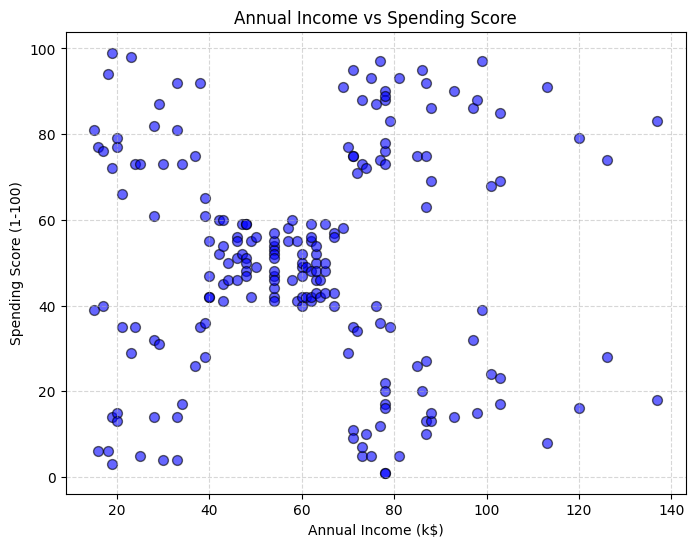

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(df_n['Annual Income (k$)'],df_n['Spending Score (1-100)'],c='blue',s=50,alpha=0.6,edgecolors='k')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True,linestyle='--',alpha=0.5)
plt.show()

Part 2: K-Means Clustering 
 1.   Finding the Optimal Number of Clusters (k): 
    ○   Use the  Elbow Method  to determine the optimal value  of 'k'. 
    ○   Iterate through a range of k values (e.g., 1 to 10). 
    ○   For each k, fit a KMeans model and calculate the Within-Cluster Sum of  Squares (WCSS), which is the inertia_ attribute of the fitted model. 
    ○   Plot the WCSS values against the number of clusters (k). The "elbow"  point on the graph indicates the optimal k.  
 2.   Applying K-Means: 
    ○   Based on the Elbow Method, choose the optimal k. 
    ○   Initialize and fit the KMeans model to your data with the chosen number  of clusters. 
    ○   Get the cluster labels for each data point from the labels_ attribute.  
 3.   Visualize K-Means Results: 
    ○   Create a scatter plot of the data points, coloring each point according to  its assigned cluster label. 
    ○   Plot the centroids of the clusters on the same graph to clearly mark the  center of each group. 
    ○   Add a title, axis labels, and a legend to your plot. 

In [56]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_n[['Annual Income (k$)','Spending Score (1-100)']])

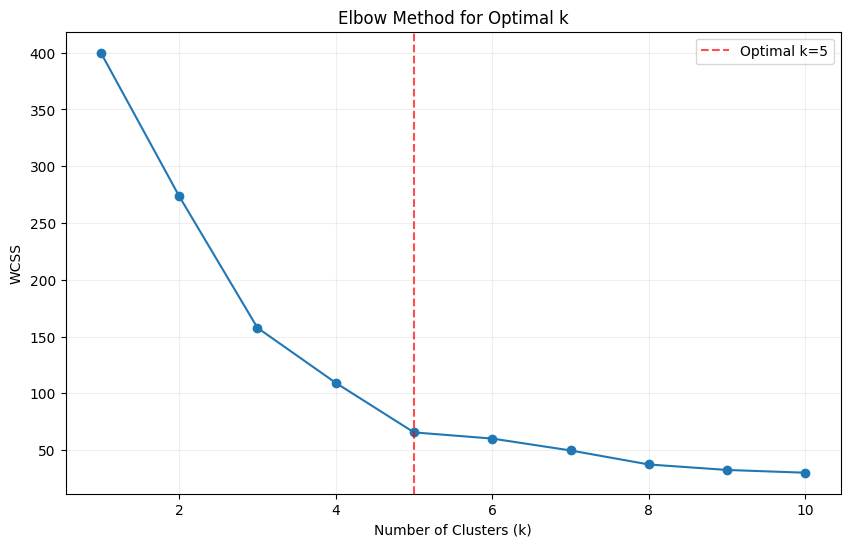

In [118]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss,marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.axvline(x=5,color='red',linestyle='--',alpha=0.7,label='Optimal k=5')
plt.grid(True,alpha=0.2)
plt.legend()
plt.show()

In [119]:
kmeans=KMeans(n_clusters=5,random_state=42)
labels=kmeans.fit_predict(df_scaled)

print(f"Inertia (WCSS): {kmeans.inertia_}")

df_n['kmean_Cluster']=labels
df_n

Inertia (WCSS): 65.56840815571681


,Annual Income (k$),Spending Score (1-100),Cluster,kmean_Cluster
0,15,39,4,4
1,15,81,3,2
2,16,6,4,4
3,16,77,3,2
4,17,40,4,4
...,...,...,...,...
195,120,79,1,1
196,126,28,0,3
197,126,74,1,1
198,137,18,0,3


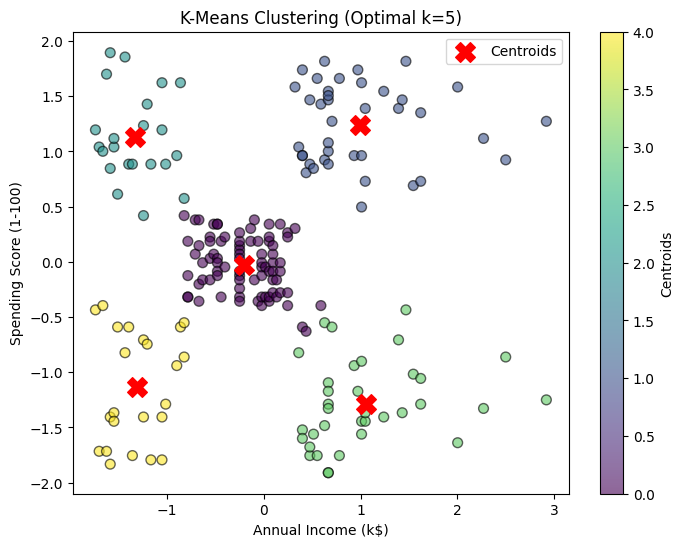

In [70]:
plt.figure(figsize=(8,6))
scatter=plt.scatter(df_scaled[:,0],df_scaled[:,1], c=labels,cmap='viridis',s=50,alpha=0.6,edgecolors='k')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',s=200,marker='X',label='Centroids')
plt.colorbar(scatter,label="Centroids")
plt.title("K-Means Clustering (Optimal k=5)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

Part 3: Agglomerative Hierarchical Clustering 
 1.   Creating a Dendrogram: 
    ○   Use the scipy.cluster.hierarchy library to generate a dendrogram for your  data. A ward linkage method is recommended. 
    ○   Visualize the dendrogram. The y-axis represents the distance between  clusters. The optimal number of clusters can be determined by finding  the tallest vertical line that doesn't cross any extended horizontal lines  and counting the number of vertical lines it intersects.  
 2.   Applying Hierarchical Clustering: 
    ○   Based on your analysis of the dendrogram, choose the optimal number  of clusters. 
    ○   Initialize and fit an AgglomerativeClustering model from scikit-learn  with your chosen number of clusters and ward affinity. 
    ○   Get the cluster labels for each data point.  
 3.   Visualize Hierarchical Clustering Results: 
    ○   Create a scatter plot similar to the one for K-Means, coloring each data  point according to its assigned cluster from the hierarchical model.

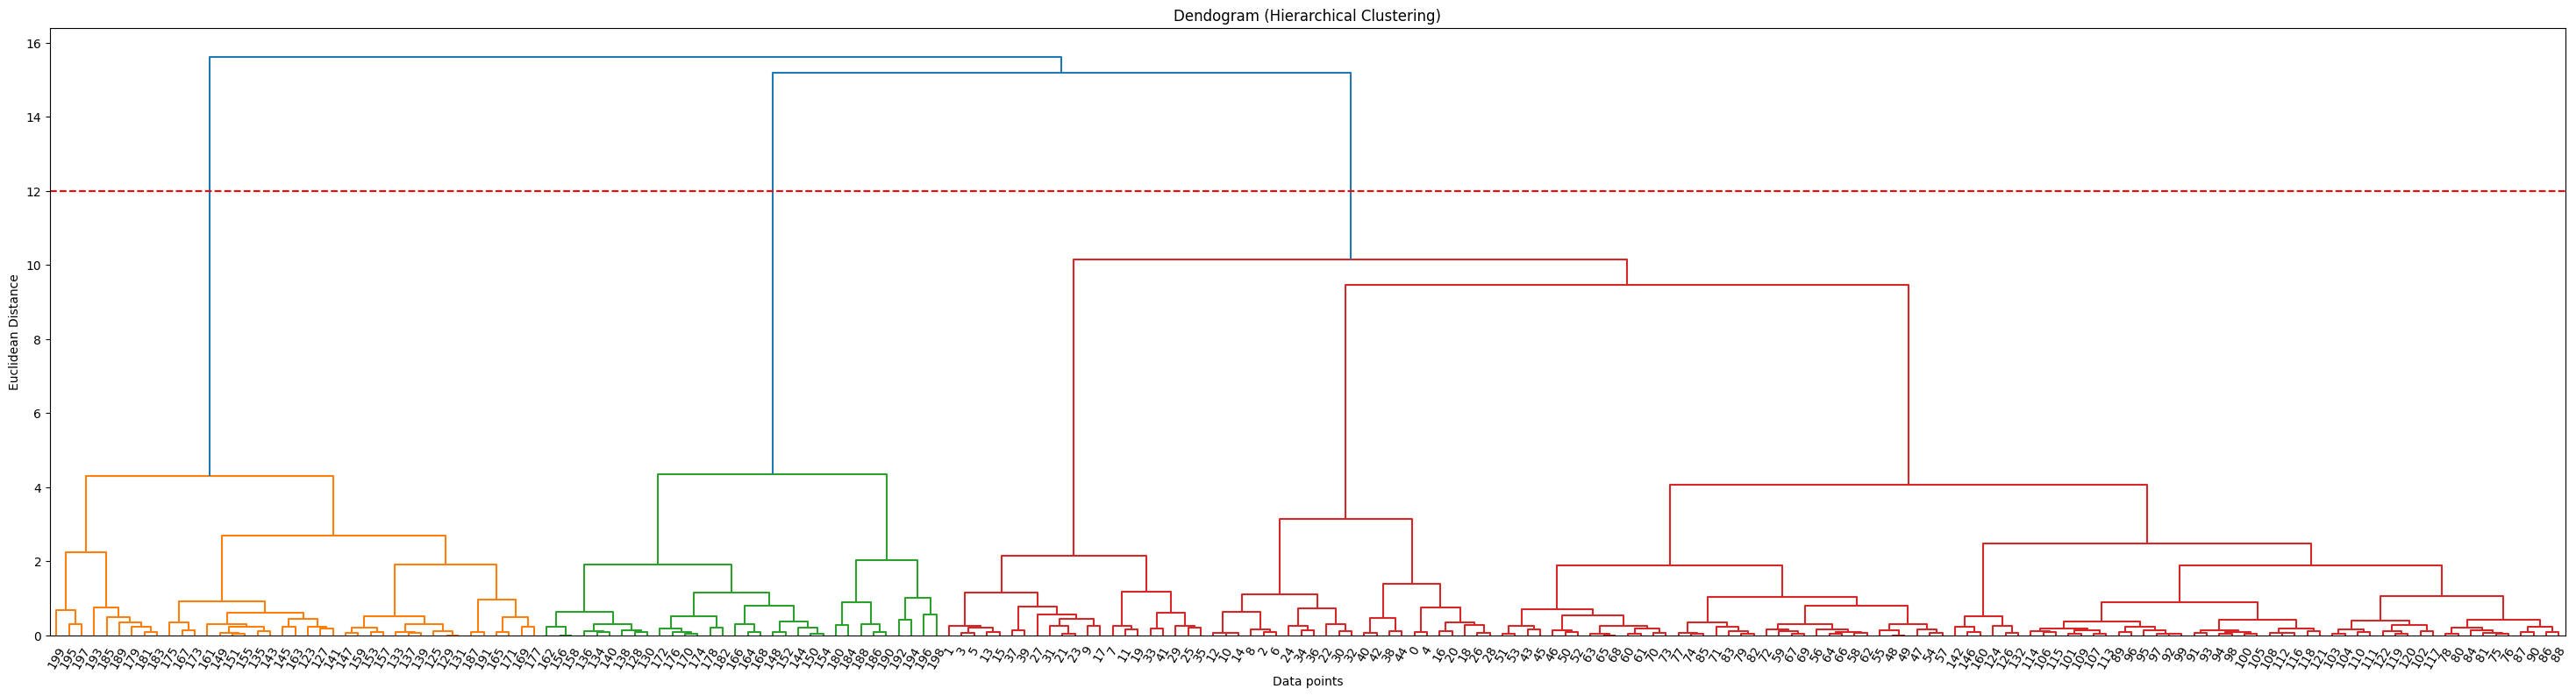

In [69]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(37,9))
dndgram=sch.dendrogram(sch.linkage(df_scaled,method='ward'),leaf_rotation=60,leaf_font_size=10)
plt.axhline(y=12,color='r',linestyle='--')
plt.title("Dendogram (Hierarchical Clustering)")
plt.xlabel("Data points")
plt.ylabel("Euclidean Distance")
plt.show()

i chose y=12 as the cut off because it is the largest vertical distance in the dendogram, giving a clear separation of 4 clusters
i took n_clusters=5 for richer segmentation (more detail)

In [120]:
hc=AgglomerativeClustering(n_clusters=5,linkage='ward')
y_hc=hc.fit_predict(df_scaled)
df_n['hc_Cluster']=y_hc
print(df_n['hc_Cluster'].value_counts())

hc_Cluster
2    85
1    39
0    32
4    23
3    21
Name: count, dtype: int64


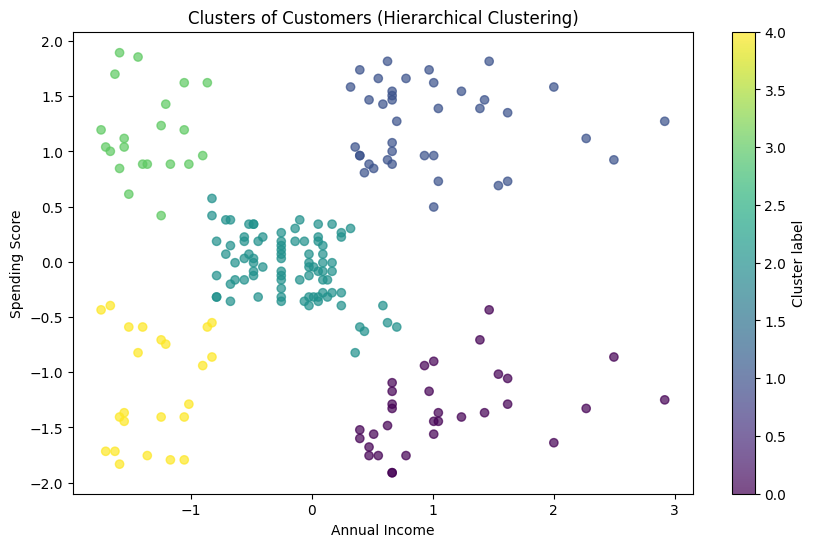

In [65]:
plt.figure(figsize=(10,6))
scatter=plt.scatter(df_scaled[:,0],df_scaled[:,1],c=y_hc,cmap='viridis',alpha=0.7)

plt.title("Clusters of Customers (Hierarchical Clustering)")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

plt.colorbar(scatter,label="Cluster label")
plt.show()

Part 4: DBSCAN Clustering 
 1.   Applying DBSCAN: 
    ○   DBSCAN does not require you to specify the number of clusters  beforehand. Instead, it requires two parameters: eps (the maximum  distance between two samples for one to be considered as in the  neighborhood of the other) and min_samples (the number of samples in  a neighborhood for a point to be considered as a core point). 
    ○   Experiment with different values for eps and min_samples. A good  starting point for this dataset could be eps=5 and min_samples=5. 
    ○   Initialize and fit the DBSCAN model to your data. 
    ○   Get the cluster labels. Note that DBSCAN will label noise points as -1.   
2.Visualize DBSCAN Results: 
    ○   Create a scatter plot of the data, coloring points by their cluster label. 
    ○   Make sure to handle the noise points (label -1). It is common practice to  plot them in a distinct color, like black, to differentiate them from the  actual clusters. 

In [123]:
dbscan=DBSCAN(eps=0.46,min_samples=5)
dbscan_labels=dbscan.fit_predict(df_scaled)
df_n['DBSCAN_cluster']=dbscan_labels
unique_label=np.unique(dbscan_labels)
for lbl in unique_label:
    if lbl==-1:
        print(f"Noise points: {np.sum(dbscan_labels==lbl)}")
    else:
        print(f"Cluster {lbl}: {np.sum(dbscan_labels==lbl)} points")

print(f"Number of clusters: {len(unique_label)-(1 if -1 in unique_label else 0)}")
print(f"Number of noise points: {np.sum(dbscan_labels==-1)}")

Noise points: 11
Cluster 0: 144 points
Cluster 1: 11 points
Cluster 2: 34 points
Number of clusters: 3
Number of noise points: 11


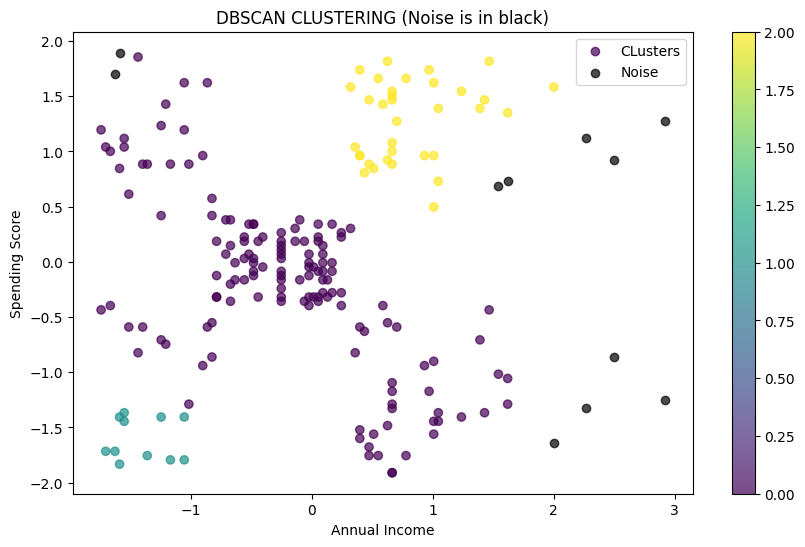

In [124]:
plt.figure(figsize=(10,6))
mask=dbscan_labels!=-1
scatter=plt.scatter(df_scaled[mask,0],df_scaled[mask,1],c=dbscan_labels[mask],cmap='viridis',alpha=0.7,label='CLusters')
plt.scatter(df_scaled[~mask,0],df_scaled[~mask,1],c='black',alpha=0.7,label='Noise')

plt.title("DBSCAN CLUSTERING (Noise is in black)")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")


plt.colorbar(scatter)
plt.legend()
plt.show()

Text(0.5, 1.0, 'DBSCAN Cluster (Black=Noise)')

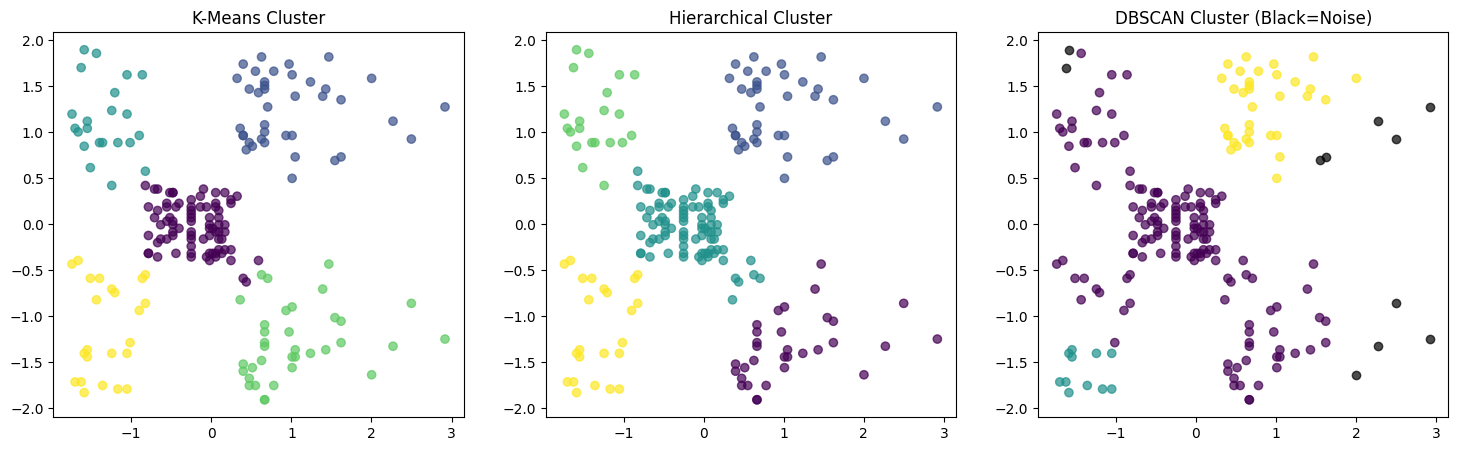

In [128]:
fig,axes=plt.subplots(1,3,figsize=(18,5))
axes[0].scatter(df_scaled[:,0],df_scaled[:,1],c=df_n['kmean_Cluster'],cmap='viridis',alpha=0.7)
axes[0].set_title("K-Means Cluster")

axes[1].scatter(df_scaled[:,0],df_scaled[:,1],c=df_n['hc_Cluster'],cmap='viridis',alpha=0.7)
axes[1].set_title("Hierarchical Cluster")

mask=df_n['DBSCAN_cluster']!=-1
axes[2].scatter(df_scaled[mask,0],df_scaled[mask,1],c=df_n['DBSCAN_cluster'][mask],cmap='viridis',alpha=0.7,label='CLusters')
axes[2].scatter(df_scaled[~mask,0],df_scaled[~mask,1],c='black',alpha=0.7,label='Noise')

axes[2].set_title("DBSCAN Cluster (Black=Noise)")

In [127]:
# Silhouette Score
print('Kmeans Silhouette Score:',silhouette_score(df_scaled,labels))
print('HC Silhouette Score:',silhouette_score(df_scaled,y_hc))
mask=df_n['DBSCAN_cluster']!=-1
print('DBSCAN Silhouette Score:',silhouette_score(df_scaled[mask],df_n['DBSCAN_cluster'][mask]))

Kmeans Silhouette Score: 0.5546571631111091
HC Silhouette Score: 0.5538089226688662
DBSCAN Silhouette Score: 0.35364142756852107
